In [5]:
import tensorflow as tf
import numpy as np
import cv2
import os
import shutil
import matplotlib.pyplot as plt

In [6]:
# Muat model (kalau kamu belum reload model-nya)
model = tf.keras.models.load_model('/kaggle/input/cnncrash/keras/default/1/CNN Crash Car Model.keras')

In [7]:
# Class names dari dataset
class_names = ['01–minor', '02–moderate', '03–severe']  # urut sesuai train_ds.class_names

# Fungsi preprocessing gambar
def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, [224, 224])
    img = tf.image.convert_image_dtype(img, tf.float32)  # normalisasi ke [0,1]
    img = tf.expand_dims(img, axis=0)  # Tambahkan batch dimensi
    return img

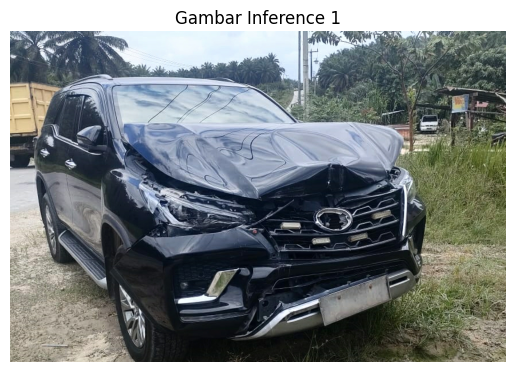

In [8]:
# Path gambar uji
image_path = '/kaggle/input/testinference/crashcartest.jpg'

#Tampilkan gambar asli
img_display = tf.io.read_file(image_path)
img_display = tf.image.decode_image(img_display, channels=3)
plt.imshow(img_display)
plt.axis('off')
plt.title('Gambar Inference 1')
plt.show()

In [9]:
# Preprocess
input_img = preprocess_image(image_path)

# Prediksi
pred = model.predict(input_img)
predicted_class = class_names[np.argmax(pred)]

print("Prediksi kelas:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediksi kelas: 03–severe


Dari hasil prediksi diatas bisa disimpulkan bahwa hasilnya termasuk kelas 'severe'.